1.このSprintについて

Sprintの目的
フレームワークのコードを読めるようにする
フレームワークを習得し続けられるようになる
理論を知っている範囲をフレームワークで動かす

どのように学ぶか
前半はTensorFlowのExampleを動かします。後半ではKerasのコードを書いていきます。



2.公式Example

深層学習フレームワークには公式にさまざまなモデルのExampleコードが公開されています。

【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。


models/tutorials at master · tensorflow/models



In [6]:
import tensorflow as tf
#MNIST データセットをロードして準備します。サンプルを整数から浮動小数点数に変換します。


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#層を積み重ねてtf.keras.Sequentialモデルを構築します。訓練のためにオプティマイザと損失関数を選びます。


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
#モデルはそれぞれの標本について、クラスごとに"ロジット"や"対数オッズ比"と呼ばれるスコアを算出します。


predictions = model(x_train[:1]).numpy()
predictions

11501568/11490434 [==============================] - 0s 0us/step


array([[-0.19375807, -0.00592916, -0.42173827,  0.08965285,  0.23956344,
        -0.34693778, -0.31630155, -0.25438863,  0.277129  ,  0.635714  ]],
      dtype=float32)

In [7]:
#tf.nn.softmax 関数はクラスごとにこれらのロジットを "確率" に変換します。


tf.nn.softmax(predictions).numpy()

#osses.SparseCategoricalCrossentropy 損失関数は、ロジットと True の インデックスに関するベクトルを入力にとり、それぞれの標本についてクラスごとに損失のスカラーを返します。


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#この損失は、クラスが正しい確率の対数をとって符号を反転させたものです。この値はモデルがこのクラスが正しいと確信しているときに 0 になります。

#この訓練されていないモデルはランダムに近い確率 (それぞれのクラスについて 1/10) を出力します、最初の損失は -tf.log(1/10) ~= 2.3 に近い値になるはずです。


loss_fn(y_train[:1], predictions).numpy()

#2.835742

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
#Model.fit メソッドは損失を最小化するようにモデルのパラメータを調整します。


model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2951 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9771


In [8]:
#Model.evaluate メソッドはモデルの性能を検査します。これには通常 "検証用データセット" または "テストデータセット" を用います。


model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0774 - accuracy: 0.9765


[0.077410988509655, 0.9764999747276306]

In [9]:
# この画像識別器はこのデータセットにおいておよそ 98% の正解率にまで訓練されました。更に学ぶためには TensorFlow tutorials を参照ください。

# モデルが確率を返すようにしたい場合には、モデルをラップしてソフトマックス関数を適用してください。


probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.3679927e-09, 3.5711346e-07, 1.4474948e-06, 5.9018097e-05,
        2.1659141e-12, 4.2424833e-08, 2.1846240e-14, 9.9993765e-01,
        1.2449914e-07, 1.4235010e-06],
       [3.2943415e-10, 3.5085464e-05, 9.9996209e-01, 2.8213335e-06,
        1.6761081e-14, 5.4220990e-08, 1.3055530e-11, 1.9893752e-15,
        4.0260337e-09, 5.0822077e-12],
       [3.3601859e-06, 9.9911863e-01, 1.9506276e-04, 3.2992961e-05,
        1.8586456e-05, 1.4663496e-07, 2.8445820e-06, 5.6018430e-04,
        6.6789245e-05, 1.4384877e-06],
       [9.9991703e-01, 2.0671062e-11, 3.8143025e-05, 9.8168499e-08,
        2.4875385e-08, 3.4291832e-05, 1.3915317e-06, 1.1095802e-06,
        1.5097955e-07, 7.7442537e-06],
       [2.9304847e-06, 2.8167979e-10, 8.4179992e-06, 2.2102403e-08,
        9.8780245e-01, 4.0793620e-07, 9.4387860e-06, 3.7931084e-05,
        4.9800515e-06, 1.2133376e-02]], dtype=float32)>

In [10]:
#[問題１まとめ] 正解確率が９８パーセントと高い精度を出すことが分かった

【問題2】（アドバンス課題）さまざまな手法を実行

In [11]:
#略

3.異なるフレームワークへの書き換え

「Sprint13 TensorFlow」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。


Iris（Iris-versicolorとIris-virginicaのみの2値分類）
Iris（3種類すべての目的変数を使用して多値分類）
House Prices
MNIST

Kerasへの書き換え
KerasはTensorFLowに含まれるtf.kerasモジュールを使用してください。


KerasにはSequentialモデルかFunctional APIかなど書き方に種類がありますが、これは指定しません。




【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。




In [12]:
"""
kerasで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
# データセットの読み込み
# dataset_path ="Iris.csv"
dataset_path ='/content/drive/MyDrive/DIC/Iris.csv'
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.float32)[:, np.newaxis]


#アヤメの分類の学習
from sklearn.model_selection import train_test_split as split
# x_train, x_test, y_train, y_test = split(iris.data,iris.target,train_size=0.8,test_size=0.2)
x_train, x_test, y_train, y_test = split(X,y,train_size=0.8,test_size=0.2, random_state=0)
import tensorflow as tf
import keras
from keras.layers import Dense,Activation
 
#ニュートラルネットワークで使用するモデル作成
model = keras.models.Sequential()
model.add(Dense(units=32,input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=2))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
 
#教師あり学習の実行
model.fit(x_train,y_train,epochs=100)
 
#評価の実行
score = model.evaluate(x_test,y_test,batch_size = 1)
print(score[1])
 
#1つのデータに対する評価の実行方法
import numpy as np
x = np.array([[5.1,3.5,1.4,0.2]])
r = model.predict(x)
print(r)
r.argmax()

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9117 - accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6017 - accuracy: 0.8125
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5996 - accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5938 - accuracy: 0.9500
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5929 - accuracy: 0.8375
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.8875
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 0.5839 - accuracy: 0.9750
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5832 - accuracy: 0.7375
Epoch 11/100
3/3 [===========

0

【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。




In [13]:
"""
kerasで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
# データセットの読み込み
# dataset_path ="Iris.csv"
dataset_path ='/content/drive/MyDrive/DIC/Iris.csv'
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)
# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.float32)[:, np.newaxis]


#アヤメの分類の学習
from sklearn.model_selection import train_test_split as split
# x_train, x_test, y_train, y_test = split(iris.data,iris.target,train_size=0.8,test_size=0.2)
x_train, x_test, y_train, y_test = split(X,y,train_size=0.8,test_size=0.2, random_state=0)
import tensorflow as tf
import keras
from keras.layers import Dense,Activation
 
#ニュートラルネットワークで使用するモデル作成
model = keras.models.Sequential()
model.add(Dense(units=32,input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
 
#教師あり学習の実行
model.fit(x_train,y_train,epochs=100)
 
#評価の実行
score = model.evaluate(x_test,y_test,batch_size = 1)
print(score[1])
 
#1つのデータに対する評価の実行方法
import numpy as np
x = np.array([[5.1,3.5,1.4,0.2]])
r = model.predict(x)
print(r)
r.argmax()


Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9014 - accuracy: 0.5750
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.7000
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6017 - accuracy: 0.7875
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.7000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.8625
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5646 - accuracy: 0.9125
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.6750
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5805 - accuracy: 0.7750
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5589 - accuracy: 0.8625
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5432 - accuracy: 0.8375
Epoch 11/100
3/3 [===========

1

【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。




In [118]:
import tensorflow as tf
# i0 = Input(shape=(64, ))
# i1 = Input(shape=(64, ))
# x0 = Concatenate()([i0, i1])
# x1 = Dense(32, activation="tanh")(x0)
# x2 = Dense(32, activation="tanh")(x1)
# x3 = Add()([x1, x2])
# x4 = Dense(1, activation="sigmoid")(x3)
# model = Model([i0, i1], x4)
# model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(2,))])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))


# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(2,)))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='softmax'))

In [119]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


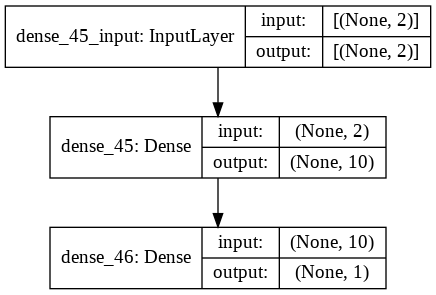

In [120]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)

In [121]:
model.compile(loss='mean_squared_error',
              optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

In [122]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/DIC/train.csv')

# 被説明変数データを取得
data_x =df.loc[:,['GrLivArea','YearBuilt']]

# 被説明変数データを取得
data_y =  df.loc[:, ['SalePrice']]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

In [126]:
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=1)

# history=model.fit(x_train,y_train,epochs=100,validation_split=0.5,batch_size=20,verbose=2)
# result=model.predict_classes(X,verbose=0)

Epoch 1/100
1168/1168 [==============================] - 2s 2ms/step - loss: 38848806912.0000 - accuracy: 0.0000e+00
Epoch 2/100
1168/1168 [==============================] - 2s 2ms/step - loss: 38848831488.0000 - accuracy: 0.0000e+00
Epoch 3/100
1168/1168 [==============================] - 2s 1ms/step - loss: 38848806912.0000 - accuracy: 0.0000e+00
Epoch 4/100
1168/1168 [==============================] - 2s 1ms/step - loss: 38848802816.0000 - accuracy: 0.0000e+00
Epoch 5/100
1168/1168 [==============================] - 2s 1ms/step - loss: 38848802816.0000 - accuracy: 0.0000e+00
Epoch 6/100
1168/1168 [==============================] - 2s 1ms/step - loss: 38848790528.0000 - accuracy: 0.0000e+00
Epoch 7/100
1168/1168 [==============================] - 2s 1ms/step - loss: 38848794624.0000 - accuracy: 0.0000e+00
Epoch 8/100
1168/1168 [==============================] - 2s 1ms/step - loss: 38848831488.0000 - accuracy: 0.0000e+00
Epoch 9/100
1168/1168 [==============================] - 2s 2ms/

In [127]:
y_pred_proba = model.predict(x_train)[:, 0]
# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0. 0. 0. ... 0. 0. 0.]
y_pred [0 0 0 ... 0 0 0]


In [128]:
score = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

37/37 [==============================] - 0s 1ms/step - loss: 38848819200.0000 - accuracy: 0.0000e+00
Train loss: 38848819200.0
Train accuracy: 0.0


【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

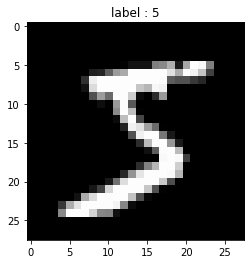

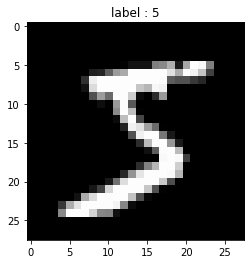

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

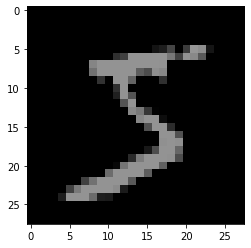

In [18]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

plt.imshow(image, 'gray', vmin = 0, vmax = 255)


X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [20]:
x_train, x_test, y_train, y_test= train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(x_train.shape) # (48000, 784)
print(x_test.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [21]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#255の整数値だが，0〜1の実数に変換する：
x_train, x_test = x_train / 255.0, x_test / 255.0

#簡単なモデルを定義
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

#学習
model.fit(x_train, y_train, epochs=5)

#評価
model.evaluate(x_test, y_test)

#予測
# y_pred = tf.argmax(model.predict(x_test), axis=-1).numpy()

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3003 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1442 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9727
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0758 - accuracy: 0.9766


[0.07575145363807678, 0.9765999913215637]